# HSE 2021: Mathematical Methods for Data Analysis

## Homework 2

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.datasets import load_boston

%matplotlib inline

sns.set(style="darkgrid")

### Data

For this homework we use Boston Dataset from sklearn (based on UCI ML housing dataset).

In [41]:
data = load_boston() # load dataset

X = data.data
y = data.target
columns = data.feature_names

## Linear regression

#### 1. [0.5 points] Create Pandas DataFrame and split the data into train and test sets with ratio 80:20 with random_state=0.

In [42]:
from pandas import DataFrame

x_df = DataFrame(data=X, columns=columns)
y_df = DataFrame(data=y, columns=['Y'])

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.8, random_state=0)

#### 2. [1 point] Train models on train data using StatsModels library and apply it to the test set; use $RMSE$ and $R^2$ as the quality measure.

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.01$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.01$

Don't forget to scale the data before training the models with StandardScaler!

In [44]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

scaler = StandardScaler()

x_train_scaled = DataFrame(data=scaler.fit_transform(x_train), columns=columns, index=x_train.index)
x_test_scaled = DataFrame(data=scaler.transform(x_test), columns=columns, index=x_test.index)

x_train_scaled = sm.add_constant(x_train_scaled)
x_test_scaled = sm.add_constant(x_test_scaled)

In [45]:
model = sm.OLS(y_train, x_train_scaled)

In [46]:
lr = model.fit()

y_predicted = lr.predict(x_train_scaled)
y_predicted_test = lr.predict(x_test_scaled)

print('Linear regression:')

print('RMSE : %.4f' % sklearn.metrics.mean_squared_error(y_train, y_predicted, squared=False))
print('R2   : %.4f' % sklearn.metrics.r2_score(y_train, y_predicted))

print('RMSE (test data): %.4f' % sklearn.metrics.mean_squared_error(y_test, y_predicted_test, squared=False))
print('R2   (test data): %.4f' % sklearn.metrics.r2_score(y_test, y_predicted_test))

Linear regression:
RMSE : 4.3962
R2   : 0.7730
RMSE (test data): 5.7835
R2   (test data): 0.5892


In [47]:
alpha = 0.01
ridge = model.fit_regularized(L1_wt=0, alpha=alpha)
ridge = sm.regression.linear_model.OLSResults(model, ridge.params, model.normalized_cov_params)

y_predicted = ridge.predict(x_train_scaled)
y_predicted_test = ridge.predict(x_test_scaled)

print('Ridge (alpha=%f):' % alpha)

print('RMSE : %.4f' % sklearn.metrics.mean_squared_error(y_train, y_predicted, squared=False))
print('R2   : %.4f' % sklearn.metrics.r2_score(y_train, y_predicted))

print('RMSE (test data): %.4f' % sklearn.metrics.mean_squared_error(y_test, y_predicted_test, squared=False))
print('R2   (test data): %.4f' % sklearn.metrics.r2_score(y_test, y_predicted_test))

Ridge (alpha=0.010000):
RMSE : 4.4039
R2   : 0.7722
RMSE (test data): 5.8270
R2   (test data): 0.5830


In [48]:
alpha = 0.01
lasso = model.fit_regularized(L1_wt=1, alpha=alpha)
lasso = sm.regression.linear_model.OLSResults(model, lasso.params, model.normalized_cov_params)

y_predicted = lasso.predict(x_train_scaled)
y_predicted_test = lasso.predict(x_test_scaled)

print('Lasso (alpha=%f):' % alpha)

print('RMSE : %.4f' % sklearn.metrics.mean_squared_error(y_train, y_predicted, squared=False))
print('R2   : %.4f' % sklearn.metrics.r2_score(y_train, y_predicted))

print('RMSE (test data): %.4f' % sklearn.metrics.mean_squared_error(y_test, y_predicted_test, squared=False))
print('R2   (test data): %.4f' % sklearn.metrics.r2_score(y_test, y_predicted_test))

Lasso (alpha=0.010000):
RMSE : 4.3968
R2   : 0.7730
RMSE (test data): 5.7962
R2   (test data): 0.5874


#### 3. [1 point] Explore the values of the parameters of the resulting models and compare the number of zero weights in them. Comment on the significance of the coefficients, overal model significance and other related factors from the results table

In [49]:
lr.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.765    
Dependent Variable: Y                AIC:                2370.9385
Date:               2021-03-12 15:20 BIC:                2426.9583
No. Observations:   404              Log-Likelihood:     -1171.5  
Df Model:           13               F-statistic:        102.2    
Df Residuals:       390              Prob (F-statistic): 9.64e-117
R-squared:          0.773            Scale:              20.020   
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const     22.6119     0.2226   101.5764   0.0000   22.1742   23.0495
CRIM      -0.9708     0.2980    -3.2575   0.0012   -1.5568   -0.3849
ZN         1.0571     0.3408     3.1022   0.0021    0.3872    1.7271
INDUS      0.0383     0.4428     0.0865   0.9311   -0.8324    0.9090
CHAS       0.5945     0.2291     2.5946   0.0098    0.1440    1.0450
NOX       -1.8551     0.4846    -3.8282   0.0002   -2.8079   -0.9024
RM         2.5732     0.3175     8.1058   0.0000    1.9491    3.1974
AGE       -0.0876     0.4022    -0.2178   0.8277   -0.8784    0.7032
DIS       -2.8809     0.4446    -6.4800   0.0000   -3.7550   -2.0068
RAD        2.1122     0.6069     3.4805   0.0006    0.9191    3.3054
TAX       -1.8753     0.6652    -2.8191   0.0051   -3.1832   -0.5675
PTRATIO   -2.2928     0.3003    -7.6359   0.0000   -2.8831   -1.7024
B          0.7182     0.2613     2.7486   0.0063    0.2045    1.2319
LSTAT     -3.5925     0.3954    -9.0855   0.0000   -4.3698   -2.8151
------------------------------------------------------------------
Omnibus:             141.494       Durbin-Watson:          1.996  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       629.882
Skew:                1.470         Prob(JB):               0.000  
Kurtosis:            8.365         Condition No.:          10     
==================================================================

"""

На уровене значимости $0.05$ следующие признаки имеют нулевые веса:
* INDUS
* AGE

In [50]:
print(lr.pvalues[lr.pvalues > 0.05].index.values)

['INDUS' 'AGE']


Значение p-value для F статистики равно $9.64 \times 10^{-117}$, что намного меньше чем $0.05$. Поэтому на уровене значимости $0.05$ модель является значимой, т.е. предсказывает зависимую переменную лучше чем модель состоящяя только из константы

In [51]:
ridge.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.765    
Dependent Variable: Y                AIC:                2372.3540
Date:               2021-03-12 15:20 BIC:                2428.3738
No. Observations:   404              Log-Likelihood:     -1172.2  
Df Model:           13               F-statistic:        101.7    
Df Residuals:       390              Prob (F-statistic): 1.90e-116
R-squared:          0.772            Scale:              20.091   
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const     22.3880     0.2230   100.3946   0.0000   21.9496   22.8264
CRIM      -0.9389     0.2986    -3.1449   0.0018   -1.5259   -0.3519
ZN         0.9965     0.3414     2.9190   0.0037    0.3253    1.6676
INDUS     -0.0576     0.4436    -0.1298   0.8968   -0.9298    0.8146
CHAS       0.6098     0.2295     2.6566   0.0082    0.1585    1.0611
NOX       -1.7222     0.4854    -3.5477   0.0004   -2.6766   -0.7678
RM         2.6120     0.3180     8.2135   0.0000    1.9868    3.2372
AGE       -0.1155     0.4029    -0.2867   0.7745   -0.9078    0.6767
DIS       -2.7539     0.4454    -6.1834   0.0000   -3.6295   -1.8783
RAD        1.8348     0.6079     3.0181   0.0027    0.6396    3.0301
TAX       -1.6265     0.6664    -2.4407   0.0151   -2.9366   -0.3163
PTRATIO   -2.2561     0.3008    -7.5007   0.0000   -2.8475   -1.6648
B          0.7188     0.2617     2.7463   0.0063    0.2042    1.2334
LSTAT     -3.5287     0.3961    -8.9086   0.0000   -4.3074   -2.7499
------------------------------------------------------------------
Omnibus:             147.660       Durbin-Watson:          1.990  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       694.793
Skew:                1.521         Prob(JB):               0.000  
Kurtosis:            8.659         Condition No.:          10     
==================================================================

"""

На уровене значимости $0.05$ следующие признаки имеют нулевые веса:
* INDUS
* AGE

In [52]:
print(x_train_scaled.columns[ridge.pvalues > 0.05].values)

['INDUS' 'AGE']


На уровне значимости $0.01$ также признак **TAX** имеет нулевой вес:

In [53]:
print(x_train_scaled.columns[ridge.pvalues > 0.01].values)

['INDUS' 'AGE' 'TAX']


In [54]:
lasso.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.765    
Dependent Variable: Y                AIC:                2371.0439
Date:               2021-03-12 15:20 BIC:                2427.0637
No. Observations:   404              Log-Likelihood:     -1171.5  
Df Model:           13               F-statistic:        102.1    
Df Residuals:       390              Prob (F-statistic): 1.01e-116
R-squared:          0.773            Scale:              20.025   
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const     22.6019     0.2226   101.5182   0.0000   22.1642   23.0396
CRIM      -0.9403     0.2981    -3.1547   0.0017   -1.5263   -0.3543
ZN         1.0215     0.3408     2.9972   0.0029    0.3514    1.6916
INDUS      0.0000     0.4429     0.0000   1.0000   -0.8708    0.8708
CHAS       0.5948     0.2292     2.5955   0.0098    0.1442    1.0453
NOX       -1.8029     0.4847    -3.7200   0.0002   -2.7558   -0.8500
RM         2.5852     0.3175     8.1423   0.0000    1.9609    3.2094
AGE       -0.0690     0.4023    -0.1715   0.8639   -0.8599    0.7220
DIS       -2.8085     0.4446    -6.3162   0.0000   -3.6827   -1.9343
RAD        1.9567     0.6070     3.2238   0.0014    0.7634    3.1501
TAX       -1.7392     0.6653    -2.6141   0.0093   -3.0472   -0.4311
PTRATIO   -2.2788     0.3003    -7.5884   0.0000   -2.8692   -1.6884
B          0.7056     0.2613     2.7000   0.0072    0.1918    1.2193
LSTAT     -3.5969     0.3955    -9.0956   0.0000   -4.3744   -2.8194
------------------------------------------------------------------
Omnibus:             143.585       Durbin-Watson:          1.997  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       649.888
Skew:                1.488         Prob(JB):               0.000  
Kurtosis:            8.455         Condition No.:          10     
==================================================================

"""

На уровене значимости $0.05$ следующие признаки имеют нулевые веса:
* INDUS
* AGE

In [55]:
print(x_train_scaled.columns[lasso.pvalues > 0.05].values)

['INDUS' 'AGE']


#### 4. [1 point] Implement one of the elimination algorithms that were described in the Seminar_4 (Elimination by P-value, Forward elimination, Backward elimination), make conclusions.

In [56]:
def eliminate_by_pvalue(model, alpha):
    if not isinstance(model, sm.OLS):
        raise Exception('only OLS models are supported')
        
    x = DataFrame(data=model.exog, columns=[model.exog_names]) 
    y = DataFrame(data=model.endog, columns=[model.endog_names])
    
    max_iter = model.exog.shape[1]
    
    for i in range(max_iter):
        res = sm.OLS(y, x).fit()
        max_pvalue = res.pvalues.max()
        if(max_pvalue < alpha):
            break
        col_to_drop = res.pvalues.index.values[res.pvalues.argmax()]
        x.drop(labels=col_to_drop, axis=1, level=0, inplace=True)
    
    return sm.OLS(y, x)

In [57]:
threshold = 0.05
shrinked_model = eliminate_by_pvalue(model, threshold)
shrinked_model.fit().summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.767    
Dependent Variable: Y                AIC:                2366.9962
Date:               2021-03-12 15:20 BIC:                2415.0132
No. Observations:   404              Log-Likelihood:     -1171.5  
Df Model:           11               F-statistic:        121.3    
Df Residuals:       392              Prob (F-statistic): 8.15e-119
R-squared:          0.773            Scale:              19.921   
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const     22.6119     0.2221   101.8292   0.0000   22.1753   23.0485
CRIM      -0.9694     0.2969    -3.2652   0.0012   -1.5531   -0.3857
ZN         1.0657     0.3349     3.1817   0.0016    0.4072    1.7242
CHAS       0.5950     0.2276     2.6145   0.0093    0.1476    1.0425
NOX       -1.8752     0.4455    -4.2092   0.0000   -2.7511   -0.9993
RM         2.5571     0.3092     8.2693   0.0000    1.9492    3.1651
DIS       -2.8621     0.4144    -6.9062   0.0000   -3.6768   -2.0473
RAD        2.1039     0.5729     3.6725   0.0003    0.9776    3.2302
TAX       -1.8509     0.5893    -3.1410   0.0018   -3.0094   -0.6924
PTRATIO   -2.2922     0.2953    -7.7616   0.0000   -2.8729   -1.7116
B          0.7116     0.2591     2.7460   0.0063    0.2021    1.2211
LSTAT     -3.6205     0.3676    -9.8482   0.0000   -4.3433   -2.8977
------------------------------------------------------------------
Omnibus:             140.146       Durbin-Watson:          1.999  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       614.839
Skew:                1.459         Prob(JB):               0.000  
Kurtosis:            8.292         Condition No.:          8      
==================================================================

"""

Слегка улучшилась метрика $Adj. R^2$ 

#### 5. [1 point] Find the best (in terms of RMSE) $\alpha$ for Ridge regression using cross-validation with 5 folds. You must select values from range $[10^{-4}, 10^{3}]$.

alphas: [1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
best alpha: 10.0000
best score: 4.5553
RMSE : 4.4057
R2   : 0.7720
RMSE (test data): 5.8539
R2   (test data): 0.5792


Text(0, 0.5, 'RMSE')

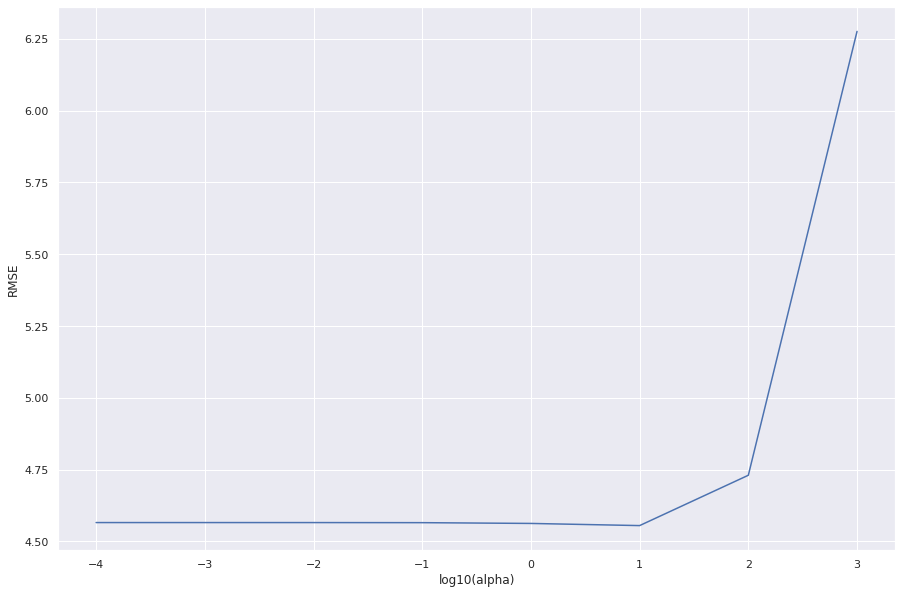

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alphas = 10 ** np.array(range(-4, 4), dtype=np.float)
folds = 5

print('alphas: %s' % alphas)
searcher = GridSearchCV(Ridge(), {'alpha' : alphas}, scoring='neg_root_mean_squared_error', cv=folds)
searcher.fit(x_train_scaled, y_train)

print('best alpha: %.4f' % searcher.best_params_['alpha'])
print('best score: %.4f' % -searcher.best_score_)

y_predicted = searcher.predict(x_train_scaled)
y_predicted_test = searcher.predict(x_test_scaled)

print('RMSE : %.4f' % sklearn.metrics.mean_squared_error(y_predicted, y_train, squared=False))
print('R2   : %.4f' % sklearn.metrics.r2_score(y_train, y_predicted))

print('RMSE (test data): %.4f' % sklearn.metrics.mean_squared_error(y_predicted_test, y_test, squared=False))
print('R2   (test data): %.4f' % sklearn.metrics.r2_score(y_test, y_predicted_test))

plt.figure(figsize=(15,10))
plt.plot(np.log10(alphas), -searcher.cv_results_["mean_test_score"])
plt.xlabel('log10(alpha)')
plt.ylabel('RMSE')

## Gradient descent

#### 6. [3.5 points] Implement a linear regression model for the MSE loss function, trained by gradient descent.

All calculations must be vectorized, and python loops can only be used for gradient descent iterations. As a stop criterion, you must use (simultaneously):

* checking for the Euclidean norm of the weight difference on two adjacent iterations (for example, less than some small number of the order of $10^{-6}$, set by the `tolerance` parameter);
* reaching the maximum number of iterations (for example, 10000, set by the `max_iter` parameter).

You need to implement:

* Full gradient descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Stochastic Gradient Descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ is the estimate of the gradient over the butch of objects selected randomly.

* Momentum method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$


To make sure that the optimization process really converges, we will use the `loss_history` class attribute. After calling the `fit` method, it should contain the values of the loss function for all iterations, starting from the first one (before the first step on the anti-gradient).

You need to initialize the weights with a zero or random (from a normal distribution) vector. The following is a template class that needs to contain the code implementing all variations of the models.

В обычном градиентном спуске и методе моментов learning rate вычисляется как: $$\eta_t = \frac{s0}{t}$$ где $s0$ - `eta`, т.е. шаг на первой итерации, $t$ - номер итерации. В стохастическом градиентном спуске использовалась функция: $$\eta_t = \lambda \left(\frac{s_0}{s_0 + t}\right)^p$$

In [59]:
from sklearn.base import BaseEstimator

class LinReg(BaseEstimator):
    def __init__(self, gd_type='Momentum', tolerance=1e-4, max_iter=1000, 
                 w0=None, eta=1e-2, alpha=1e-3, batch_size=None, lambda_param=0.1, p=0.5):
        """
        gd_type: 'GradientDescent', 'StochasticDescent', 'Momentum'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        eta: learning rate
        alpha: momentum coefficient
        """
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
        ##
        self.batch_size = batch_size
        self.lambda_param = lambda_param
        self.p = p
    
    def default_w0(len):
        return np.random.uniform(-1, 1, len)
        
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """        
        
        self.w0 = LinReg.default_w0(X.shape[1]) if self.w0 is None else self.w0
        
        self.loss_history = [LinReg._calc_loss(X, y, self.w0)]
        
        if self.gd_type == 'GradientDescent':
            self.w = self.full_gradient_descent(X, y)
        elif self.gd_type == 'StochasticDescent':
            self.batch_size = self.batch_size or X.shape[0] // 10 
            self.w = self.stochastic_gradient_descent(X, y)
        elif self.gd_type == 'Momentum':
            self.w = self.momentum_gradient_descent(X, y)
        else:
            raise Exception('unknown gradient method %s' % self.gd_type)
        
        return self
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        return LinReg._predict(X, self.w)
    
    def _predict(X, w):
        return np.dot(X, w)
    
    def grad(X, y, w):
        return 2 * np.dot(X.T, np.dot(X, w) - y) / X.shape[0]
    
    def full_gradient_descent_step(self, X, y, w, step):
        grad = LinReg.grad(X, y, w)
        w -= step * grad
        return w
    
    def full_gradient_descent(self, X, y):
        w = np.array(self.w0)
        w_prev = np.array(w)
        
        for i in range(self.max_iter):
            s = self.eta / (i + 1)
            w = self.full_gradient_descent_step(X, y, w, s)
            self.loss_history.append(LinReg._calc_loss(X, y, w))
            
            if np.linalg.norm(w - w_prev) < self.tolerance:
                break
            
            w_prev[:] = w
            
        return w
    
    def stochastic_gradient_descent_step(self, X, y, w, step):
        grad = LinReg.grad(X, y, w)
        w -= step * grad
        return w
        
    def stochastic_gradient_descent(self, X, y):
        w = np.array(self.w0)
        w_prev = np.array(w)
        
        s0 = 1.0
        
        for i in range(self.max_iter):
            samples = np.random.choice(X.shape[0], self.batch_size, replace=False)
            
            x_batch = X[samples, :]
            y_batch = y[samples]
            
            s = self.lambda_param * np.power(s0 / (s0 + i + 1), self.p) 
            
            w = self.stochastic_gradient_descent_step(x_batch, y_batch, w, s)
            self.loss_history.append(LinReg._calc_loss(X, y, w))
            
            if np.linalg.norm(w - w_prev) < self.tolerance:
                break
            
            w_prev[:] = w
            
        return w
    
    def momentum_gradient_descent_step(self, X, y, w, h_prev, step):
        grad = LinReg.grad(X, y, w)
        h = self.alpha * h_prev + step * grad
        w -= h
        return h, w
    
    def momentum_gradient_descent(self, X, y):
        w = np.array(self.w0)
        w_prev = np.array(w)
        h = 0
        
        for i in range(self.max_iter):
            s = self.eta / (i + 1)
            h, w = self.momentum_gradient_descent_step(X, y, w, h, s)
            self.loss_history.append(LinReg._calc_loss(X, y, w))
            
            if np.linalg.norm(w - w_prev) < self.tolerance:
                break
                
            w_prev[:] = w
            
        return w
    
    def _calc_loss(X, y, w):
        y_predicted = LinReg._predict(X, w)
        return ((y - y_predicted)**2).sum() / X.shape[0]

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        return LinReg._calc_loss(X, y, self.w)

#### 7. [1 points] Train and validate "hand-written" models on the same data, and compare the quality with the Sklearn or StatsModels methods. Investigate the effect of the `max_iter` and `alpha` parameters on the optimization process. Is it consistent with your expectations?

Т.к. LinReg работает с numpy.ndarray, преобразуем тренировочные и тестовые данные:

In [60]:
x_train_np = x_train_scaled.values
x_test_np = x_test_scaled.values
y_train_np = y_train.values.reshape(y_train.shape[0])
y_test_np = y_test.values.reshape(y_test.shape[0])

Рассмотрим влияния параметров `max_iter` и `alpha` на процесс оптимизации на примере "метода моментов". Параметр `tolerance` пока выставим достаточно малым, чтобы гарантировать выполнения всех `max_iter` итераций. На графике ниже построены зависимости функции потерь ($MSE$) от количества итераций для разных `alpha`. Нулевой `alpha` соответствует обычному градиентному спуску. Для удобства вертикальная шкала прологарифмирована. По графику видно, что при слишком больших `alpha` целевая функция сильно осцилирует и, в связи с этим, может плохо сходиться. При малых `alpha` целевая функция сходится довольно плавно, но медленнее чем при каких-то средних `alpha`. `max_iter` влияет только на то как близко к оптимуму успеет подобраться метод

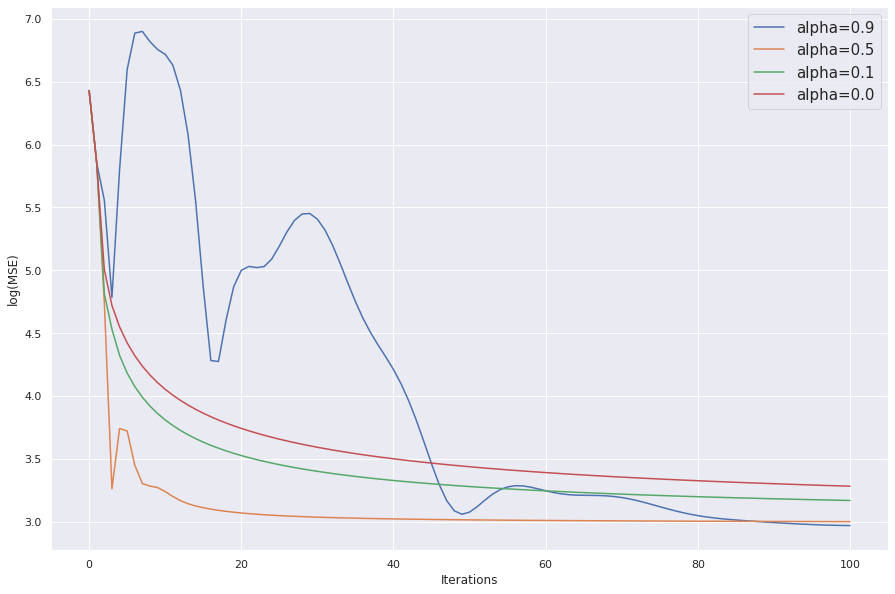

In [61]:
plt.figure(figsize=(15, 10))
plt.xlabel('Iterations')
plt.ylabel('log(MSE)')

w0 = LinReg.default_w0(x_train_np.shape[1])

for alpha in [0.9, 0.5, 0.1, 0.0]:
    mgd = LinReg(gd_type='Momentum', w0=w0, eta=0.2, tolerance=1e-10, alpha=alpha, max_iter=100).fit(x_train_np, y_train_np)
    plt.plot(np.array(range(len(mgd.loss_history))), np.log(mgd.loss_history), label=f'alpha={alpha}')
    
plt.legend(prop={'size':15})

Натренируем все модели на 100 итерациях:

In [62]:
w0 = LinReg.default_w0(x_train_np.shape[1])

fgd = LinReg(gd_type='GradientDescent', w0=w0, eta=0.5, tolerance=1e-6, max_iter=100).fit(x_train_np, y_train_np)
sgd = LinReg(gd_type='StochasticDescent', w0=w0, eta=0.5, tolerance=1e-6, max_iter=100, batch_size=32, lambda_param=0.5, p=0.6).fit(x_train_np, y_train_np)
mgd = LinReg(gd_type='Momentum', eta=0.5, w0=w0, tolerance=1e-6, max_iter=100, alpha=0.1).fit(x_train_np, y_train_np)

Возьмем для сравнений модель без регуляризации, так как она показала лучшие значения метрик $RMSE$ и $R^2$ 

In [63]:
lr_predicted = lr.predict(x_train_scaled)
lr_predicted_test = lr.predict(x_test_scaled)

print('Linear regression:')
print('RMSE : %.4f' % sklearn.metrics.mean_squared_error(y_train, lr_predicted, squared=False))
print('R2   : %.4f' % sklearn.metrics.r2_score(y_train, lr_predicted))
print('RMSE (test data): %.4f' % sklearn.metrics.mean_squared_error(y_test, lr_predicted_test, squared=False))
print('R2   (test data): %.4f' % sklearn.metrics.r2_score(y_test, lr_predicted_test))

Linear regression:
RMSE : 4.3962
R2   : 0.7730
RMSE (test data): 5.7835
R2   (test data): 0.5892


Полученные параметры оказались слегка хуже по метрикам $RMSE$ и $R^2$ чем параметры, полученные при помощи statsmodels:

In [64]:
fgd_predicted = fgd.predict(x_train_np)
fgd_predicted_test = fgd.predict(x_test_np)

print('Full gradient descent:')
print('RMSE : %.4f' % sklearn.metrics.mean_squared_error(y_train, fgd_predicted, squared=False))
print('R2   : %.4f' % sklearn.metrics.r2_score(y_train, fgd_predicted))
print('RMSE (test data): %.4f' % sklearn.metrics.mean_squared_error(y_test, fgd_predicted_test, squared=False))
print('R2   (test data): %.4f' % sklearn.metrics.r2_score(y_test, fgd_predicted_test))

sgd_predicted = sgd.predict(x_train_np)
sgd_predicted_test = sgd.predict(x_test_np)

print('\nStochastic gradient descent:')
print('RMSE : %.4f' % sklearn.metrics.mean_squared_error(y_train, sgd_predicted, squared=False))
print('R2   : %.4f' % sklearn.metrics.r2_score(y_train, sgd_predicted))
print('RMSE (test data): %.4f' % sklearn.metrics.mean_squared_error(y_test, sgd_predicted_test, squared=False))
print('R2   (test data): %.4f' % sklearn.metrics.r2_score(y_test, sgd_predicted_test))

mgd_predicted = mgd.predict(x_train_np)
mgd_predicted_test = mgd.predict(x_test_np)

print('\nMomentum method:')
print('RMSE : %.4f' % sklearn.metrics.mean_squared_error(y_train, mgd_predicted, squared=False))
print('R2   : %.4f' % sklearn.metrics.r2_score(y_train, mgd_predicted))
print('RMSE (test data): %.4f' % sklearn.metrics.mean_squared_error(y_test, mgd_predicted_test, squared=False))
print('R2   (test data): %.4f' % sklearn.metrics.r2_score(y_test, mgd_predicted_test))

Full gradient descent:
RMSE : 4.4691
R2   : 0.7654
RMSE (test data): 5.9963
R2   (test data): 0.5584

Stochastic gradient descent:
RMSE : 4.5186
R2   : 0.7602
RMSE (test data): 6.0115
R2   (test data): 0.5562

Momentum method:
RMSE : 4.4600
R2   : 0.7664
RMSE (test data): 5.9768
R2   (test data): 0.5613


#### 8. [1 points] Plot graphs (on the same picture) of the dependence of the loss function value on the iteration number for Full GD, SGD and Momentum. Draw conclusions about the rate of convergence of various modifications of gradient descent.

Don't forget about what *beautiful* graphics should look like!

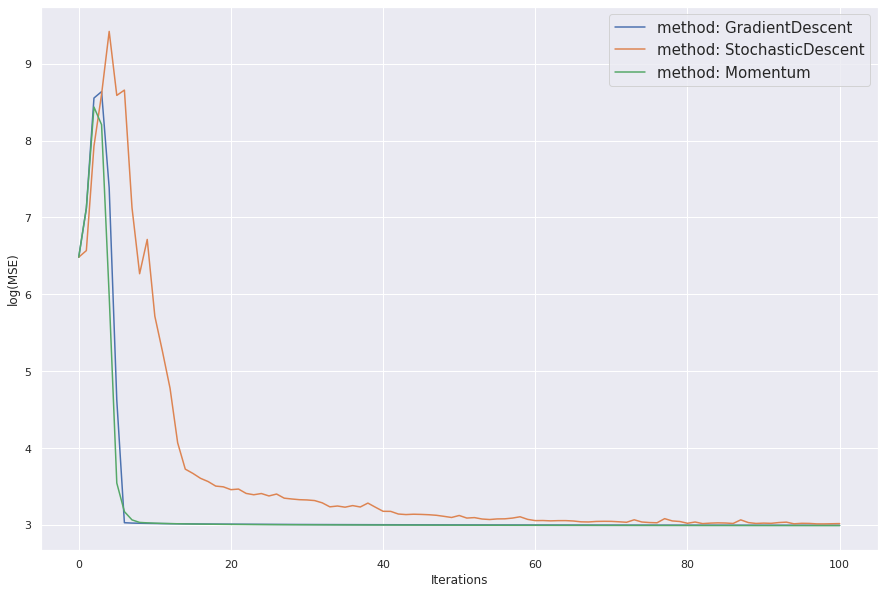

In [65]:
plt.figure(figsize=(15, 10))
plt.xlabel('Iterations')
plt.ylabel('log(MSE)')
for method in [fgd, sgd, mgd]:
    plt.plot(np.array(range(len(method.loss_history))), np.log(method.loss_history), label=f'method: {method.gd_type}')
plt.legend(prop={'size':15})

По графику заментно сильное отклонение значений целевых функций от оптимума на первых итерациях, которое проявляется на графике в виде пика в районе первых 10 итераций. Видимо это связано с тем, что значение `eta` было выбрано достаточно большим, в связи с чем на первых итерациях вектор весов изменяется очень сильно и "перелетает" через оптимум

Что касается сходимости, в моем случае быстрее всего сошлись обычный градиентный спуск и метод моментов. Стохастический градиентный спуск сходится чуть хуже. Если учитывать время работы, то быстрее всего отработает стохастический градиентный спуск, так как для него вычисление градиента является достаточно дешевой операцией.